In [375]:
# comments and details to come !
import numpy as np
import scipy as sp
import scipy.ndimage
from scipy.stats import vonmises
import os
from IPython.display import display, clear_output, HTML
import sys

import matplotlib.pyplot as plt
from matplotlib import animation, rc, offsetbox
animation.rcParams['animation.writer']='ffmpeg'
rc('animation', html='html5')

%matplotlib inline

(100L, 256L, 256L)


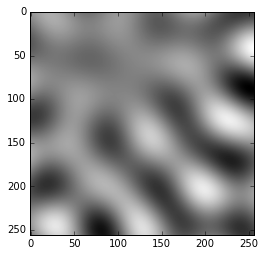

In [396]:
theta = np.linspace(-np.pi,np.pi,100)
#plt.plot(theta,vonmises.pdf(theta,10.0)+vonmises.pdf(theta+np.pi,10.0))

lx=np.linspace(0,1.0,n)
x,y=np.meshgrid(lx,lx)

th = theta[:,np.newaxis,np.newaxis]

actMap = lambda((x,y)): np.exp(2*np.pi/0.3*1j*(np.cos(th-np.pi)*x\
        +np.sin(th-np.pi)*y))#*(vonmises.pdf(th,5.0)+vonmises.pdf(th+np.pi,5.0))

#noise = np.random.randn(100,1,1)+1j*np.random.randn(100,1,1)
#noise = 2*np.pi*np.random.rand(100,1,1)
#noise = np.random.randn(50,1,1)
#noise = np.concatenate((noise,-noise), axis=0)

print actMap((x,y)).shape

#AAA1 = np.mean(actMap((x,y))*np.exp(1j*noise), axis=0)
#AA1 = np.real(np.mean(actMap((x,y))*np.exp(1j*noise), axis=0))

#AAA1 = np.mean(actMap((x,y))*noise, axis=0)
AA0 = np.real(np.mean(actMap((x,y))*noise, axis=0))

#plt.imshow(0.5*np.angle( ( np.mean(actMap((x,y))*noise, axis=0) )), cmap='hsv' )   
plt.imshow(AA0, cmap='gray')

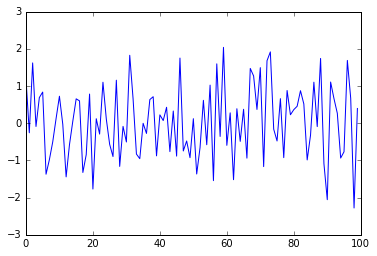

In [397]:
plt.plot(noise[:,0,0].real)

-161.699291284
3013.24389689


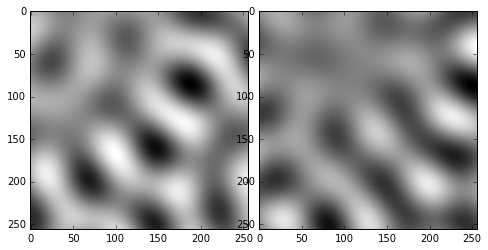

In [398]:
fig1, axes1 = plt.subplots(nrows=1, ncols=2,figsize=(8, 6))
fig1.subplots_adjust(wspace=0.05, hspace=0.1)

axes1[0].imshow(AA1, cmap='gray')
axes1[1].imshow(AA0, cmap='gray')
print np.sum(AA0*AA1)
print np.sum(AAA1.real*AAA1.imag)

In [28]:
n = 256
lx=np.concatenate((np.linspace(0,n/2-1,n/2),np.linspace(-n/2,-1,n/2)))
x,y=np.meshgrid(lx,lx)
r=np.sqrt(x**2+y**2)

sig = 0.5
mu = 5.0
    
cov = np.sqrt(np.exp(-(r-mu)**2/(2*sig**2)))
noise = np.fft.fft2(np.random.randn(n,n)+1j*np.random.randn(n,n))

activity_map = np.fft.ifft2(cov*noise)

thmod = 0.0

stock_im = np.zeros((n,n,3))
stock_im[:,:,0] = 2.0*((activity_map.real-activity_map.real.min())/\
                       (activity_map.real.max()-activity_map.real.min())-0.5)
stock_im[:,:,1] = 2.0*((activity_map.imag-activity_map.imag.min())/\
                       (activity_map.imag.max()-activity_map.imag.min())-0.5)

base_map = stock_im[:,:,0] + 1j*stock_im[:,:,1]
map_th = 180.0/np.pi*np.angle( 1j*(np.pi*np.sin(thmod*np.pi/180.0)*\
                                  np.cos(thmod*np.pi/180.0)*stock_im[:,:,0]+\
                                  np.pi/2.0*np.cos(2.0*thmod*np.pi/180.0)*stock_im[:,:,1]) +\
                                  -np.pi*np.sin(thmod*np.pi/180.0)*np.cos(thmod*np.pi/180.0)*\
                                  stock_im[:,:,1]+np.pi/2.0*np.cos(2.0*thmod*np.pi/180.0)\
                                  *stock_im[:,:,0])/2.0+90.0

stock_im[:,:,2] = map_th

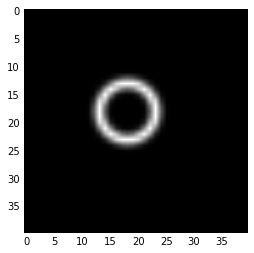

In [29]:
plt.imshow(np.fft.fftshift(cov)[110:150,110:150], cmap='gray')

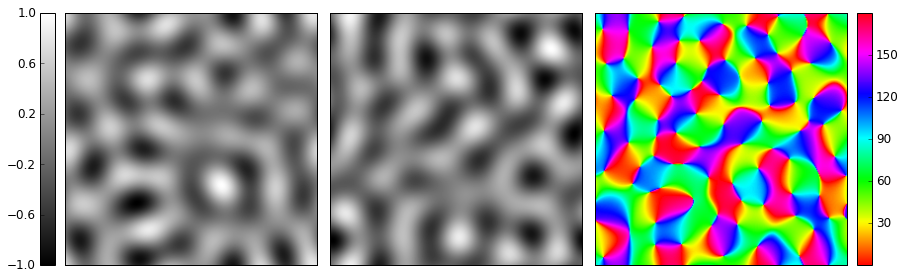

In [30]:
fig1, axes1 = plt.subplots(nrows=1, ncols=3,figsize=(14, 8))
fig1.subplots_adjust(wspace=0.05, hspace=0.1)

for k in range(3):
    plt.set_cmap('gray')
    if k==2:
        plt.set_cmap('hsv') 
    im0 = axes1[k].imshow(stock_im[:,:,k])
    if k==0:
        cax = fig1.add_axes([0.1, 0.293, 0.015, 0.438])
        cbar=fig1.colorbar(im0, cax=cax, ticks=np.arange(-1,1.01,0.4))
        cbar.ax.yaxis.set_ticks_position('left')
        cbar.ax.tick_params(labelsize=12)
    elif k==2:
        cax = fig1.add_axes([0.91, 0.293, 0.015, 0.438])
        cbar=fig1.colorbar(im0, cax=cax, ticks=np.arange(0,181,30))
        cbar.ax.tick_params(labelsize=12)

    axes1[k].xaxis.set_visible(False)
    axes1[k].yaxis.set_visible(False)

In [5]:
# First set up the figure, the axis, and the plot element we want to animate

fig01, axes01 = plt.subplots(nrows=1, ncols=1,figsize=(7, 5));
time_template = r'$\theta$ = %.1f$^o$'
time_text = axes01.text(0.0, 1.02, '', fontsize=20, transform=axes01.transAxes);
plt.close()


# animation function. This is called sequentially
def init():
    return ()

def animate(i): 
    
    theta = 2.5*i
    
    act_map = np.real( base_map * np.exp(-2.0*1j*np.pi*theta/180.0) )
    
    im0 = axes01.imshow(act_map, vmin=-1.0, vmax=1.0, cmap='gray'); 
    cax0 = fig01.add_axes([0.82, 0.126, 0.04, 0.776]);
    cbar0 = fig01.colorbar(im0, cax=cax0, ticks=np.arange(-1.0,1.1,0.4)); 
    cbar0.ax.tick_params(labelsize=15);
    time_text.set_text(time_template % (theta));
    
    axes01.xaxis.set_visible(False);
    axes01.yaxis.set_visible(False);

    return (im0,)
            
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig01, animate, init_func=init, frames=4*18, interval=100, blit=True);
HTML(anim.to_html5_video())

In [27]:
sp.misc.imsave('prodRes.png', stock_im[:,:,0]*gauss) 

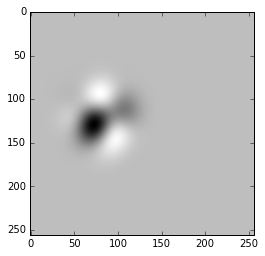

In [23]:
lx=np.linspace(0,n-1,n)
x,y=np.meshgrid(lx,lx)
gauss = np.exp(-((x-80.0)**2+(y-120.0)**2)/(2*20.0**2))

plt.imshow(stock_im[:,:,0]*gauss, cmap='gray')

In [26]:
np.min(stock_im[:,:,0]*gauss)

-0.42886027780599995

$$\displaystyle \mathrm{AICc} =\mathrm{AIC} +{\frac{2(k+1)(k+2)}{n-k-2}}$$

In [43]:
k1=18.0
print 2*376.0 + 2*k1 + 2*(k1+1)*(k1+2)/(50-k1-2)

813.333333333


In [434]:
a=np.array([ 26,36,25,37,24,38,23,39,22,40,21,41,20,42,19,
  43,18,44,17,45,16,46,15,47,14,48,13,49,12,50,
  11,51,10,52, 9,53, 8,54, 7,55, 6,56, 5,57, 4,
  58, 3,59, 2,60, 1,61, 0,62,27,63,28,35,29,34,
  30,33,31,32])

x = np.array([0,30])
y = np.linspace(-63*23,0,64)
y = y[::-1]

In [440]:
for i in range(62):
    if np.mod(i,2)==0:
        print ' %i: [%i, %i],'%(a[i],x[0],y[i])
    else:
        print ' %i: [%i, %i],'%(a[i],x[1],y[i])
print ' %i: [%i, %i],'%(a[62],5,y[62])
print ' %i: [%i, %i],'%(a[63],24,y[63])

 26: [0, 0],
 36: [30, -23],
 25: [0, -46],
 37: [30, -69],
 24: [0, -92],
 38: [30, -115],
 23: [0, -138],
 39: [30, -161],
 22: [0, -184],
 40: [30, -207],
 21: [0, -230],
 41: [30, -253],
 20: [0, -276],
 42: [30, -299],
 19: [0, -322],
 43: [30, -345],
 18: [0, -368],
 44: [30, -391],
 17: [0, -414],
 45: [30, -437],
 16: [0, -460],
 46: [30, -483],
 15: [0, -506],
 47: [30, -529],
 14: [0, -552],
 48: [30, -575],
 13: [0, -598],
 49: [30, -621],
 12: [0, -644],
 50: [30, -667],
 11: [0, -690],
 51: [30, -713],
 10: [0, -736],
 52: [30, -759],
 9: [0, -782],
 53: [30, -805],
 8: [0, -828],
 54: [30, -851],
 7: [0, -874],
 55: [30, -897],
 6: [0, -920],
 56: [30, -943],
 5: [0, -966],
 57: [30, -989],
 4: [0, -1012],
 58: [30, -1035],
 3: [0, -1058],
 59: [30, -1081],
 2: [0, -1104],
 60: [30, -1127],
 1: [0, -1150],
 61: [30, -1173],
 0: [0, -1196],
 62: [30, -1219],
 27: [0, -1242],
 63: [30, -1265],
 28: [0, -1288],
 35: [30, -1311],
 29: [0, -1334],
 34: [30, -1357],
 30: [0, -1

In [439]:
a

array([26, 36, 25, 37, 24, 38, 23, 39, 22, 40, 21, 41, 20, 42, 19, 43, 18,
       44, 17, 45, 16, 46, 15, 47, 14, 48, 13, 49, 12, 50, 11, 51, 10, 52,
        9, 53,  8, 54,  7, 55,  6, 56,  5, 57,  4, 58,  3, 59,  2, 60,  1,
       61,  0, 62, 27, 63, 28, 35, 29, 34, 30, 33, 31, 32])

In [437]:
y.shape

(64L,)